# Lab02: Analysis of Coupled Noises on PCB

Due: Febuary 5, 2019

Author: Kevin Egedy

#### Objectives


This lab is to introduce the characteristics of backward and forward coupled noises on
coupled transmission lines. You will also study how to obtain the coupling coefficients
and lumped element models from the measured data. 

In [1]:
# Libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
files = [
    'LineA_Ch1Reflection_2ns_31.6nsOffset',
    'LineA_Ch1Reflection_OPEN_2ns_30nsOffset',
    'LineA_ChA_OPEN_500ps_41.75nsOffset',
    'LineA_ChA_SHORT_500ps_41.750nsOffset',
    'LineA_ChB_OPEN_500ps_41.75nsOffset',
    'LineA_ChB_SHORT_500ps_41.952nsOffset',
    'LineB_Ch1Reflection_1200ps_33.9808nsOffset',
    'LineB_Ch1Reflection_OPEN_2ns_30nsOffset',
    'LineB_ChA_OPEN_500ps_41nsOffset',
    'LineB_ChA_SHORT_1080ps_41.0184nsOffset',
    'LineB_ChB_OPEN_500ps_41.75nsOffset',
    'LineB_ChB_SHORT_600ps_41.952nsOffset',
    'LineC_Ch1Reflection_2.4ns_30.91nsOffset',
    'LineC_Ch1Reflection_OPEN_2ns_30nsOffset',
    'LineC_ChA_OPEN_500ps_41.75nsOffset',
    'LineC_ChA_SHORT_490ps_41.38nsOffset',
    'LineC_ChB_OPEN_500ps_41.75nsOffset',
    'LineC_ChB_SHORT_430ps_42nsOffset'
]

In [3]:
# Read .xlsx files and convert them into .csv
#
for filename in files:
    df = pd.read_excel(f'data/{filename}.xlsx',header=None,nrows=1)
    with open(f'data/csv/{filename}.csv','w+') as f0: 
        f0.write(df.T.to_csv(index=False,header=None));

36263

36533

35752

35972

35655

37061

35812

36477

35882

35565

35788

36944

36283

36441

35661

35923

35624

36761

In [4]:
# Read .csv files into numpy arrays
#
LineA_Ch1Reflection_2ns_31 = \
  pd.read_csv('data/csv/LineA_Ch1Reflection_2ns_31.6nsOffset.csv',
    header=None).to_numpy()

LineA_Ch1Reflection_OPEN_2ns_30 = \
  pd.read_csv('data/csv/LineA_Ch1Reflection_OPEN_2ns_30nsOffset.csv',
    header=None).to_numpy()

LineA_ChA_OPEN_500ps_41 = \
  pd.read_csv('data/csv/LineA_ChA_OPEN_500ps_41.75nsOffset.csv',
    header=None).to_numpy()

LineA_ChA_SHORT_500ps_41 = \
  pd.read_csv('data/csv/LineA_ChA_SHORT_500ps_41.750nsOffset.csv',
    header=None).to_numpy()

LineA_ChB_OPEN_500ps_41 = \
  pd.read_csv('data/csv/LineA_ChB_OPEN_500ps_41.75nsOffset.csv',
    header=None).to_numpy()

LineA_ChB_SHORT_500ps_41 = \
  pd.read_csv('data/csv/LineA_ChB_SHORT_500ps_41.952nsOffset.csv',
    header=None).to_numpy()

LineB_Ch1Reflection_1200ps_33 = \
  pd.read_csv('data/csv/LineB_Ch1Reflection_1200ps_33.9808nsOffset.csv',
    header=None).to_numpy()

LineB_Ch1Reflection_OPEN_2ns_30 = \
  pd.read_csv('data/csv/LineB_Ch1Reflection_OPEN_2ns_30nsOffset.csv',
    header=None).to_numpy()

LineB_ChA_OPEN_500ps_41 = \
  pd.read_csv('data/csv/LineB_ChA_OPEN_500ps_41nsOffset.csv',
    header=None).to_numpy()

LineB_ChA_SHORT_1080ps_41 = \
  pd.read_csv('data/csv/LineB_ChA_SHORT_1080ps_41.0184nsOffset.csv',
    header=None).to_numpy()

LineB_ChB_OPEN_500ps_41 = \
  pd.read_csv('data/csv/LineB_ChB_OPEN_500ps_41.75nsOffset.csv',
    header=None).to_numpy()

LineB_ChB_SHORT_600ps_41 = \
  pd.read_csv('data/csv/LineB_ChB_SHORT_600ps_41.952nsOffset.csv',
    header=None).to_numpy()

LineC_Ch1Reflection_2ns_30 = \
  pd.read_csv('data/csv/LineC_Ch1Reflection_2.4ns_30.91nsOffset.csv',
    header=None).to_numpy()

LineC_Ch1Reflection_OPEN_2ns_30 = \
  pd.read_csv('data/csv/LineC_Ch1Reflection_OPEN_2ns_30nsOffset.csv',
    header=None).to_numpy()

LineC_ChA_OPEN_500ps_41 = \
  pd.read_csv('data/csv/LineC_ChA_OPEN_500ps_41.75nsOffset.csv',
    header=None).to_numpy()

LineC_ChA_SHORT_490ps_41 = \
  pd.read_csv('data/csv/LineC_ChA_SHORT_490ps_41.38nsOffset.csv',
    header=None).to_numpy()

LineC_ChB_OPEN_500ps_41 = \
  pd.read_csv('data/csv/LineC_ChB_OPEN_500ps_41.75nsOffset.csv',
    header=None).to_numpy()

LineC_ChB_SHORT_430ps_42 = \
  pd.read_csv('data/csv/LineC_ChB_SHORT_430ps_42nsOffset.csv',
    header=None).to_numpy()

In [5]:
def RoundNonZeroDecimal(num, place, rnd='ceil'):
    # Requires numpy library
    # Examples:
    #   RoundNonZeroDecimal(0.0004512,1,'floor') -> 0.0045
    #   RoundNonZeroDecimal(0.0004512,1,'ceil') -> 0.0046
    #
    tmp = num # implement so that num can be array
    mag = 0
    
    if rnd=='ceil':
        while(abs(tmp)<1):
            tmp*=10
            mag+=1
        for i in range(place):
            tmp*=10
            mag+=1
        return int(np.ceil([tmp])[0])/(10**(mag)) 
    
    if rnd=='floor':
        while(abs(tmp)<1):
            tmp*=10
            mag+=1
        for i in range(place):
            tmp*=10
            mag+=1
        return int(np.floor([tmp])[0])/(10**(mag))
    
    else:
        raise ValueError('Invalid argument')
        return None

In [6]:
# Find Rise Time

def RiseTime(np_arr,fsv=None):
    # Find the rise time as defined: 10%-90% of rising slope
    # Returns the indexes x0,x1 corresponding to the 10%,90% values

    np_arr = np.abs(np_arr)
    x0,x1 = None,None
    
    # Final State Value: Median of final 10% elements
    if fsv==None: 
        fsv = np.median(np_arr[-int(0.1*len(np_arr)):])
        
    # 10% value
    V0 = 0.1*fsv

    # 90% value
    V1 = 0.9*fsv

    # start
    place=4
    while(1):
        try:
            floor = RoundNonZeroDecimal(V0,place,'floor')
            ceil = RoundNonZeroDecimal(V0,place,'ceil')
            x0 = np.where(np_arr<ceil)[0][-1]
        except Exception as e:
            place-=1
            if place<=-1:
                raise ValueError(f'Unable to find 10% value of final state value: {fsv}')
                break
            continue
        break

    #end
    place=4
    while(1):
        try:
            floor = RoundNonZeroDecimal(V1,place,'floor')
            ceil = RoundNonZeroDecimal(V1,place,'ceil')
            x1 = np.where(np_arr>floor)[0][0]
        except Exception as e:
            place-=1
            if place<=-1:
                raise ValueError(f'Unable to find 90% value of final state value: {fsv}')
                break
            continue
        break
    
    return x0,x1

In [7]:
# Find Fall Time

def FallTime(np_arr,fsv=None):
    # Find the fall time as defined: 90%-10% of rising slope
    # Returns the indexes x0,x1 corresponding to the 90%,10% values
    
    np_arr = np.abs(np_arr)
    x0,x1 = None,None
    
    # Final State Value: Median of final 10% elements
    if fsv==None: 
        fsv = np.median(np_arr[0:int(0.1*len(np_arr))])

    # 90% value
    V0 = 0.9*fsv    

    # 10% value
    V1 = 0.1*fsv

    # start
    place=4
    while(1):
        try:
            floor = RoundNonZeroDecimal(V0,place,'floor')
            ceil = RoundNonZeroDecimal(V0,place,'ceil')
            x0 = np.where(np_arr<ceil)[0][0]
        except Exception as e:
            place-=1
            if place<=-1:
                raise ValueError(f'Unable to find 10% value of final state value: {fsv}')
                break
            continue
        break

    #end
    place=4
    while(1):
        try:
            floor = RoundNonZeroDecimal(V1,place,'floor')
            ceil = RoundNonZeroDecimal(V1,place,'ceil')
            x1 = np.where(np_arr<ceil)[0][0]
        except Exception as e:
            place-=1
            if place<=-1:
                raise ValueError(f'Unable to find 90% value of final state value: {fsv}')
                break
            continue
        break
    
    return x0,x1

In [8]:
# Plot Waveform and Peak Voltage

def WaveformPeakPlt(np_arr,x0,x1,total_time,
                    method=None,mag=9,unit='ns',title=''):
    # Assumes 5ns window
    # Plots the given waveform and the peak voltage within [x0,x1]
    
    # Figure
    fig,ax = plt.subplots(figsize=(12,4))
    L = len(np_arr)
    x,res = np.linspace(0,total_time,L,endpoint=False,retstep=True)
    Ures = res*10**mag

    # Find V0
    V0 = np.median(np_arr[x0:x1])
    if method=='max':
        V0 = np.max(np_arr[x0:x1])
    elif method=='min':
        V0 = np.min(np_arr[x0:x1])
    
    # Plot
    ax.plot(x,np_arr,  # must be plotted in this order for Matplotlib 
        color='red' 
    )
    ax.scatter(x0*res,np_arr[x0],
        color='red',
        label=f't1 @ {round(x0*Ures,2)}{unit}'
    )
    ax.scatter(x1*res,np_arr[x1],
        color='red',
        label=f't2 @ {round(x1*Ures,2)}{unit}'
    )
    ax.plot(x,np.ones(L)*V0,
        color='red',
        linewidth=1.0,
        label='$Peak$'
    )
    ax.plot(x,np_arr,
        label='Measured Values'
    )

    # Labels
    ax.ticklabel_format(axis='x',style='sci', scilimits=(-mag,-mag))
    ax.set_title(f'{title}: Peak = {round(V0,4)} V')
    ax.set_xlabel('t (s)')
    ax.set_ylabel('V')
    plt.grid(True)
    plt.legend();

In [9]:
# Plot Waveform and Rise Time

def WaveformRTimePlt(np_arr,x0,x1,total_time,
                     fsv=None,mag=9,unit='ns',title=''):
    # Assumes 5ns window
    # Plots the given waveform 
    #   and the rise time (defined as 10%-90%) between [x0,x1]
    
    # Figure
    fig,ax = plt.subplots(figsize=(12,4))
    L = len(np_arr)
    x,res = np.linspace(0,total_time,L,endpoint=False,retstep=True)
    Ures = res*10**mag
    
    # Parameters
    x10,x90 = RiseTime(np_arr[x0:x1],fsv=fsv)
    x10+=x0   # RiseTime returns index that is offset by x0
    x90+=x0   # RiseTime returns index that is offset by x0
    
    # Plot
    ax.plot(x,np_arr,
        label='Measured Values'
    )
    ax.scatter(x10*res,np_arr[x10],
        color='red',
        label=f'10% @ {round(x10*Ures,2)}{unit}'
    )
    ax.scatter(x90*res,np_arr[x90],
        color='red',
        label=f'90% @ {round(x90*Ures,2)}{unit}'
    )
    rt = RoundNonZeroDecimal((x90*Ures)-(x10*Ures),2)

    # Labels
    ax.ticklabel_format(axis='x',style='sci', scilimits=(-mag,-mag))
    ax.set_title(f'{title}: Rise Time = {rt}{unit}')
    ax.set_xlabel('t (s)')
    ax.set_ylabel('V')
    plt.grid(True)
    plt.legend();

In [10]:
# Area Approximation

def AreaApprox(f,a,b,n,offset):
    '''
    Returns the integral approximation of f(x)dx from a to b
    f : continuous waveform
    a : starting point
    b : ending point
    '''
    apprx = 0
    dxs,width = np.linspace(a,b,n,endpoint=False,retstep=True)
    for dx in dxs:
        dx = int(dx)
        midpoint = (f[dx]+f[dx+1])/2 # Use the midpoint approximation
        apprx += width*(midpoint-offset) # width is 1 second -> adjust by resolution
    return apprx[0]

In [11]:
# Plot Area Approximation

def Waveform_Area(np_arr,a,b,n,offset=0,title=''):
    # Area Approximation Part2_board2_280ps Plot
    #
    A = AreaApprox(np_arr,a,b,n,offset)
    dxs,width = np.linspace(a,b,n,endpoint=False,retstep=True)

    # plot
    fig,ax = plt.subplots(figsize=(12,4))
    for dx in dxs:
        dx = int(dx)
        midpoint = (f[dx]+f[dx+1])/2
        rect = pch.Rectangle(
            (dx,offset),
            width,
            midpoint[0]-offset,
            facecolor='#D3D3D3',
            edgecolor='grey'
        )
        ax.add_artist(rect)
    ax.plot(np_arr)
    ax.plot(
        dxs,
        np_arr[a:b],
        label=f'area = {round(A,4)}'
    )

    # labels
    ax.set_xlabel('t')
    ax.set_ylabel('V')
    ax.set_title(f'Area Approximation {title}')
    ax.grid(True)
    #plt.legend();
    return A

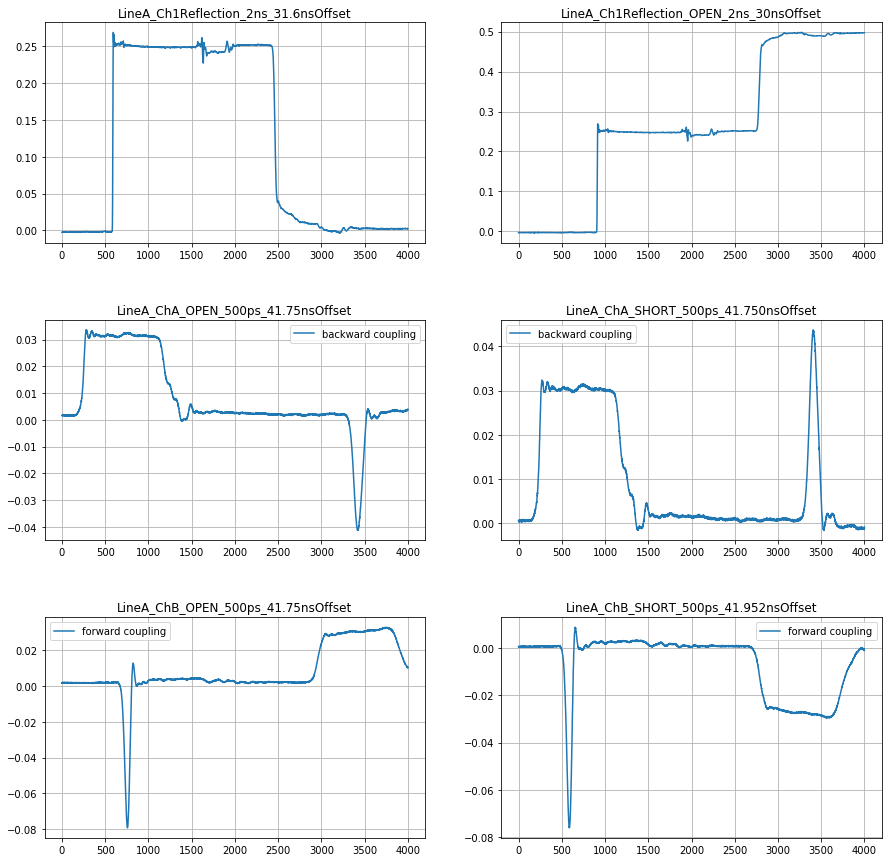

In [12]:
# Plot Overview LineA
#
fig,axs = plt.subplots(3,2,figsize=(15,15))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.20)

axs[0,0].plot(LineA_Ch1Reflection_2ns_31)
axs[0,1].plot(LineA_Ch1Reflection_OPEN_2ns_30)
axs[1,0].plot(LineA_ChA_OPEN_500ps_41,label='backward coupling')
axs[1,1].plot(LineA_ChA_SHORT_500ps_41,label='backward coupling')
axs[2,0].plot(LineA_ChB_OPEN_500ps_41,label='forward coupling')
axs[2,1].plot(LineA_ChB_SHORT_500ps_41,label='forward coupling')

axs[0,0].set_title('LineA_Ch1Reflection_2ns_31.6nsOffset')
axs[0,1].set_title('LineA_Ch1Reflection_OPEN_2ns_30nsOffset')
axs[1,0].set_title('LineA_ChA_OPEN_500ps_41.75nsOffset')
axs[1,1].set_title('LineA_ChA_SHORT_500ps_41.750nsOffset')
axs[2,0].set_title('LineA_ChB_OPEN_500ps_41.75nsOffset')
axs[2,1].set_title('LineA_ChB_SHORT_500ps_41.952nsOffset')

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)
axs[2,0].grid(True)
axs[2,1].grid(True)

axs[1,0].legend()
axs[1,1].legend()
axs[2,0].legend()
axs[2,1].legend();

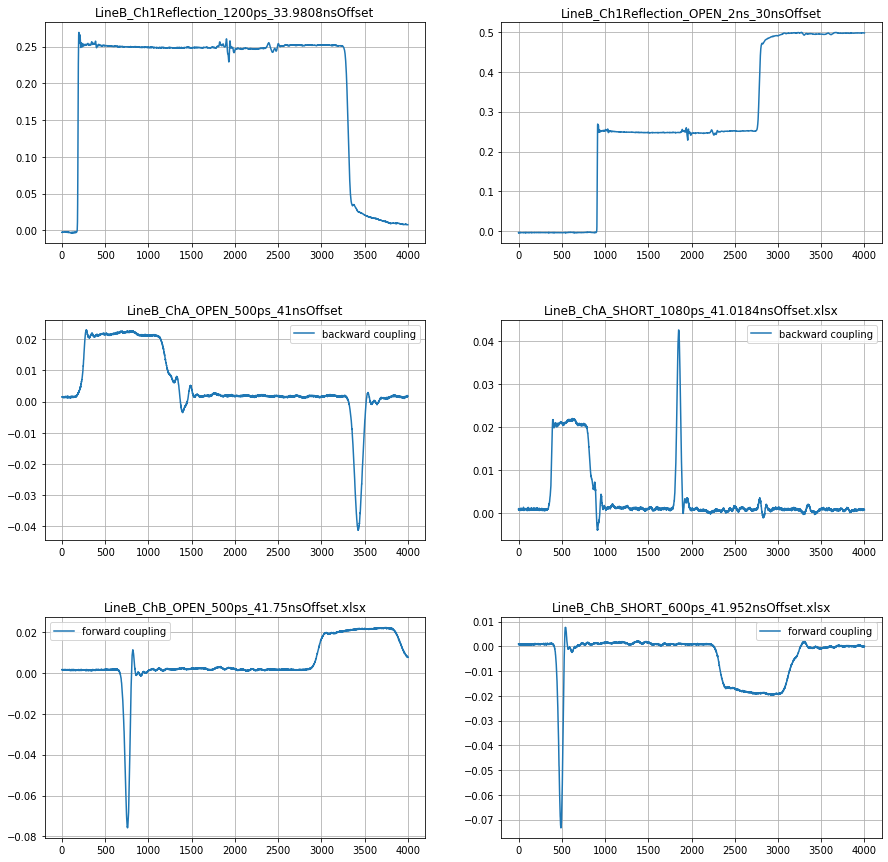

In [13]:
# Plot Overview LineB
#
fig,axs = plt.subplots(3,2,figsize=(15,15))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.20)

axs[0,0].plot(LineB_Ch1Reflection_1200ps_33)
axs[0,1].plot(LineB_Ch1Reflection_OPEN_2ns_30)
axs[1,0].plot(LineB_ChA_OPEN_500ps_41,label='backward coupling')
axs[1,1].plot(LineB_ChA_SHORT_1080ps_41,label='backward coupling')
axs[2,0].plot(LineB_ChB_OPEN_500ps_41,label='forward coupling')
axs[2,1].plot(LineB_ChB_SHORT_600ps_41,label='forward coupling')

axs[0,0].set_title('LineB_Ch1Reflection_1200ps_33.9808nsOffset')
axs[0,1].set_title('LineB_Ch1Reflection_OPEN_2ns_30nsOffset')
axs[1,0].set_title('LineB_ChA_OPEN_500ps_41nsOffset')
axs[1,1].set_title('LineB_ChA_SHORT_1080ps_41.0184nsOffset.xlsx')
axs[2,0].set_title('LineB_ChB_OPEN_500ps_41.75nsOffset.xlsx')
axs[2,1].set_title('LineB_ChB_SHORT_600ps_41.952nsOffset.xlsx')

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)
axs[2,0].grid(True)
axs[2,1].grid(True)

axs[1,0].legend()
axs[1,1].legend()
axs[2,0].legend()
axs[2,1].legend();

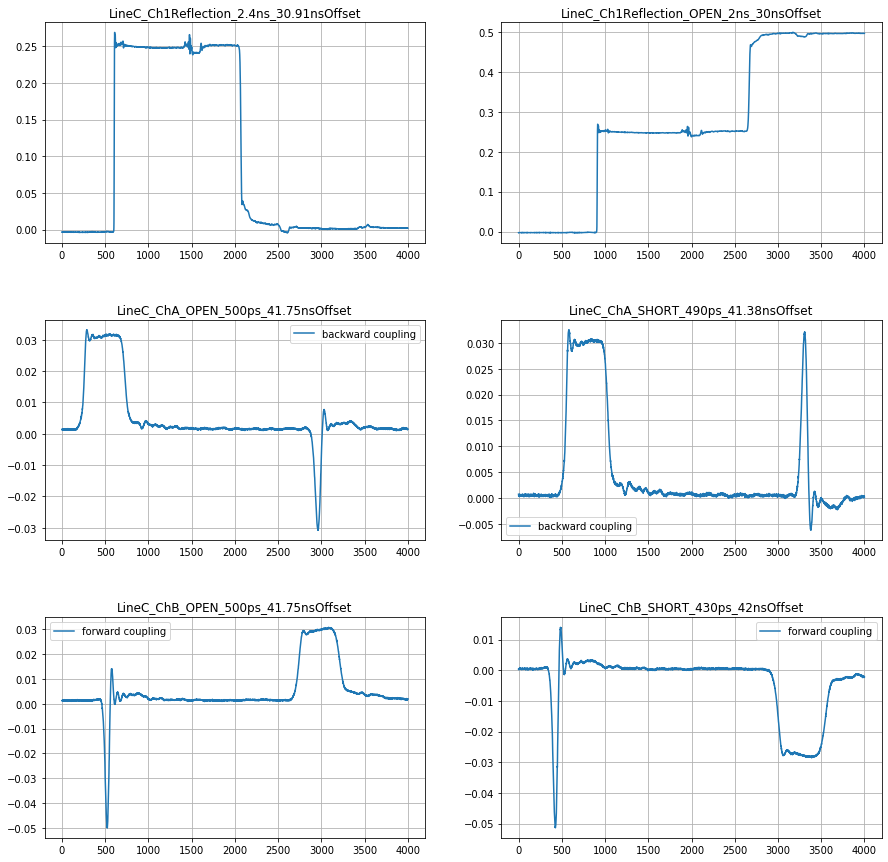

In [14]:
# Plot Overview LineC
#
fig,axs = plt.subplots(3,2,figsize=(15,15))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.20)

axs[0,0].plot(LineC_Ch1Reflection_2ns_30)
axs[0,1].plot(LineC_Ch1Reflection_OPEN_2ns_30)
axs[1,0].plot(LineC_ChA_OPEN_500ps_41,label='backward coupling')
axs[1,1].plot(LineC_ChA_SHORT_490ps_41,label='backward coupling')
axs[2,0].plot(LineC_ChB_OPEN_500ps_41,label='forward coupling')
axs[2,1].plot(LineC_ChB_SHORT_430ps_42,label='forward coupling')

axs[0,0].set_title('LineC_Ch1Reflection_2.4ns_30.91nsOffset')
axs[0,1].set_title('LineC_Ch1Reflection_OPEN_2ns_30nsOffset')
axs[1,0].set_title('LineC_ChA_OPEN_500ps_41.75nsOffset')
axs[1,1].set_title('LineC_ChA_SHORT_490ps_41.38nsOffset')
axs[2,0].set_title('LineC_ChB_OPEN_500ps_41.75nsOffset')
axs[2,1].set_title('LineC_ChB_SHORT_430ps_42nsOffset')

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)
axs[2,0].grid(True)
axs[2,1].grid(True)

axs[1,0].legend()
axs[1,1].legend()
axs[2,0].legend()
axs[2,1].legend();

<hr>

### Constants

- Permittivity of free-space $= \epsilon_0 = 8.854 \cdot 10^{-12} F/m$
- Permeability of free-space $= \mu_0 = 4\pi \cdot 10^{-7} H/m$
- Impedance of free-space $= \eta_0 = 120\pi = 376.7\Omega$
- Velocity of light in free-space $= c = 2.998 \cdot 10^8 m/s$

### Notes

**signal duration:** $[V_{in}(t) - V_{in}(t-\frac{2d}{v_0})]$

**Coupling Coefficient**

$K_C$: capacitive coupling coefficient

$K_L$: inductive coupling coefficient

<img src='images/LumpedElementModel_2TLs.png' width='500px'>

$\begin{eqnarray}
K_C &=& \frac{C_{12}}{C_{1G}+C_{12}} \\
\\
K_L &=& \frac{L_{12}}{L_{11}} &&(L_{22} = L_{11})
\end{eqnarray}$

<img src='images/setup.png' width='500px'>

<img src='images/equivalent_circuit.png' width='500px'>

**Coupled Lines**

| Coupled Lines            | A   | B  | C   |
|--------------------------|-----|----|-----|
| Coupled length *d* (cm)  | 10  | 10 | 5   |
| Line separation *s* (mm) | 0.5 | 1  | 0.5 |

**Reference Values**

| Parameter                  | | units | | Value                          |
|:---------------------------|-|-------|-|--------------------------------|
| $v_0$                      | | m/s   | | $1.71$ $\cdot$ $10^8$          |
| $K_C$ (method 1)           | |       | | $0.19890$                      |
| $K_L$ (method 1)           | |       | | $0.26191$                      |
| $K_C$ (integration method) | |       | | $0.19220$                      |
| $K_L$ (integration method) | |       | | $0.28164$                      |
| $Z_{01}$                   | | ohms  | | $45.97$                        |
| $C_{12}$                   | | pF    | | $24.50$                        |
| $C_{1G} = C_{2G}$          | | pF    | | $102.77$                       |
| $L_{11} = L_{22}$          | | nH    | | $268.80$                       |
| $L_{12}$                   | | nH    | | $75.71$                        |


In [15]:
np_arrays = [
    LineA_Ch1Reflection_2ns_31,         #
    LineA_Ch1Reflection_OPEN_2ns_30,    #
    LineA_ChA_OPEN_500ps_41,            #
    LineA_ChA_SHORT_500ps_41,           #
    LineA_ChB_OPEN_500ps_41,            #
    LineA_ChB_SHORT_500ps_41,           #
    LineB_Ch1Reflection_1200ps_33,      #
    LineB_Ch1Reflection_OPEN_2ns_30,    #
    LineB_ChA_OPEN_500ps_41,            #
    LineB_ChA_SHORT_1080ps_41,          #
    LineB_ChB_OPEN_500ps_41,            #
    LineB_ChB_SHORT_600ps_41,           #
    LineC_Ch1Reflection_2ns_30,         #
    LineC_Ch1Reflection_OPEN_2ns_30,    #
    LineC_ChA_OPEN_500ps_41,            #
    LineC_ChA_SHORT_490ps_41,           #
    LineC_ChB_OPEN_500ps_41,            #
    LineC_ChB_SHORT_430ps_42            #
]

### Procedure

**(1) Reflected, Backward and Forward Coupled Noise Measurements**

Steps:
- Connect the TDR input (Ch1) to the main line (start with the coupled line A) 
- Connect Ch A to the backward coupled path
- Connect Ch B to the forward coupled path
- Connect Cable 4 (short black cable) to the transmitted output

Data:
- Measure voltage with SHORT connected at the end of Cable 4
- Measure voltage with OPEN circuit connected at the end of Cable 4

*Repeat the same measurements for coupled lines B and C. Make sure to connect
four cables the same way*

### Analysis and Estimation of $K_C$ and $K_L$

*Use Ch 1 data (reflection) for estimating the characteristics impedance of the coupled lines*


**(1) Obtain the signal speed $v_0$ on the TL using $V_b$ waveform**

*Assume the waveform is a square wave*

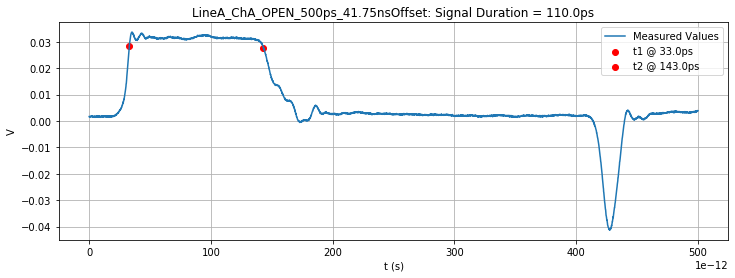

In [16]:
# Signal Duration: LineA_ChA_OPEN_500ps_41.75nsOffset
#
fig,ax = plt.subplots(figsize=(12,4))
L = len(LineA_ChA_OPEN_500ps_41)
total_time = 500*10**(-12)
mag = 12
unit='ps'
x,res = np.linspace(0,total_time,L,endpoint=False,retstep=True)
Ures = res*10**mag

# Define starting/ending points of input waveform
x10R,x90R = RiseTime( LineA_ChA_OPEN_500ps_41[0:1000] )
x90F,x10F = FallTime( LineA_ChA_OPEN_500ps_41[1000:1500] )
x0 = x90R
x1 = 1000+x90F

# Plot
ax.plot(x,LineA_ChA_OPEN_500ps_41,
    label='Measured Values'
)
ax.scatter(x0*res,LineA_ChA_OPEN_500ps_41[x0],
    color='red',
    label=f't1 @ {round(x0*Ures,2)}{unit}'
)
ax.scatter(x1*res,LineA_ChA_OPEN_500ps_41[x1],
    color='red',
    label=f't2 @ {round(x1*Ures,2)}{unit}'
)

# Labels
rt = RoundNonZeroDecimal((x1*Ures)-(x0*Ures),2)
ax.ticklabel_format(axis='x',style='sci', scilimits=(-mag,-mag))
ax.set_title(f'LineA_ChA_OPEN_500ps_41.75nsOffset: Signal Duration = {rt}{unit}')
ax.set_xlabel('t (s)')
ax.set_ylabel('V')
plt.grid(True)
plt.legend();

Given:

$\begin{eqnarray}
d &=& L = 0.01 \text{m}
\end{eqnarray}$

Measured:

$\begin{eqnarray}
t &=& 110 \text{ps} 
\end{eqnarray}$

Solve:

$\begin{eqnarray}
\Delta T &=& \frac{2L}{v} \\
v        &=& \frac{2L}{\Delta T} \\
v        &=& \frac{2(0.01)}{1.1 \cdot 10^{-9}} \\
\\
         &=& 1.82 \cdot 10^8 \text{m/s}
\end{eqnarray}$

#### Signal Speed Summary

Measured signal speed $v_0$ on the TL using $V_b$ waveform is $1.82 \cdot 10^8$ m/s.

Given value is $1.71 \cdot 10^8$ m/s.

**(2) Using the peak values of $V_b$ and $V_f$, estimate $K_C$ and $K_L$**

$[V_{in}(t) - V_{in}(t-\frac{2d}{v_0})] \rightarrow V_{\text{peak}}$

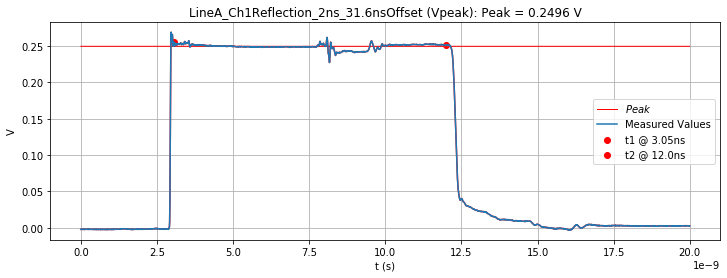

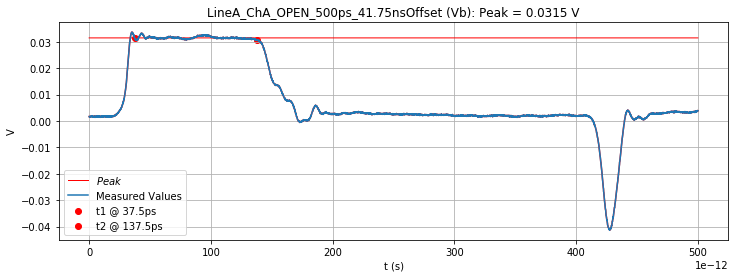

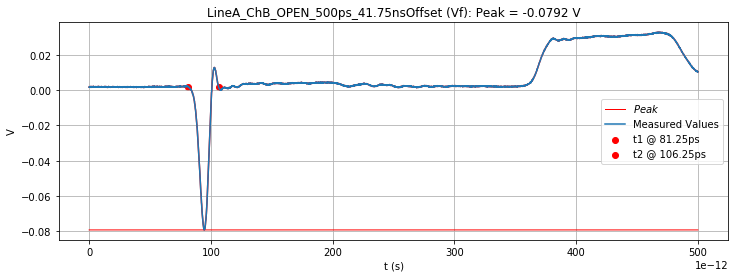

In [17]:
# V_b: LineA_Ch1Reflection_2ns_31.6nsOffset
WaveformPeakPlt(
    LineA_Ch1Reflection_2ns_31,
    x0=610,
    x1=2400,
    total_time=2*10**(-9),
    mag=9,
    unit='ns',
    title='LineA_Ch1Reflection_2ns_31.6nsOffset (Vpeak)'
)

# V_b: LineA_ChA_OPEN_500ps_41.75nsOffset
WaveformPeakPlt(
    LineA_ChA_OPEN_500ps_41,
    x0=300,
    x1=1100,
    total_time=500*10**(-12),
    mag=12,
    unit='ps',
    title='LineA_ChA_OPEN_500ps_41.75nsOffset (Vb)'
)

# V_f: LineA_ChB_OPEN_500ps_41.75nsOffset
WaveformPeakPlt(
    LineA_ChB_OPEN_500ps_41,
    x0=650,
    x1=850,
    total_time=500*10**(-12),
    method='min',
    mag=12,
    unit='ps',
    title='LineA_ChB_OPEN_500ps_41.75nsOffset (Vf)'
)

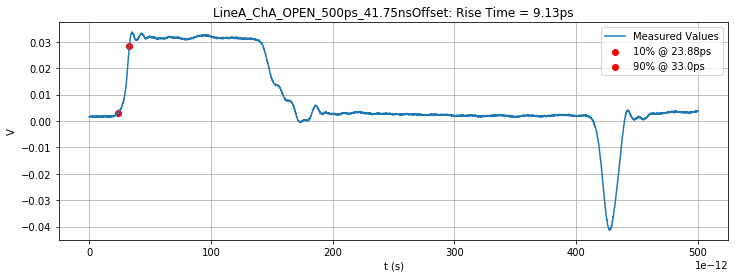

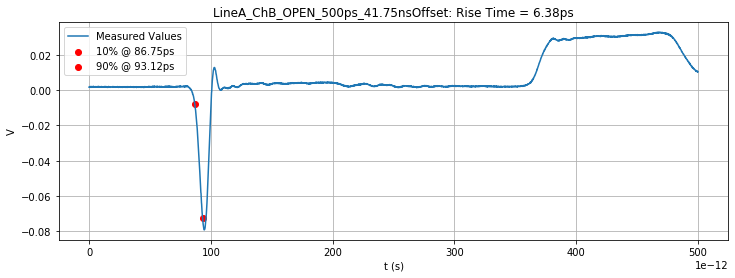

In [18]:
## Rise Time: LineA_ChA_OPEN_500ps_41.75nsOffset
WaveformRTimePlt(
    LineA_ChA_OPEN_500ps_41,
    x0=0,       # Looks for rise time within Window Bounds [x0,x1]
    x1=1000,
    total_time=500*10**(-12),
    fsv=0.0315,
    mag=12,
    unit='ps',
    title='LineA_ChA_OPEN_500ps_41.75nsOffset'
)

# Rise Time: LineA_ChB_OPEN_500ps_41.75nsOffset
WaveformRTimePlt(
    LineA_ChB_OPEN_500ps_41,
    x0=650,
    x1=800,
    total_time=500*10**(-12),
    fsv=0.0792,
    mag=12,
    unit='ps',
    title='LineA_ChB_OPEN_500ps_41.75nsOffset'
)

**Analysis $K_C$ and $K_L$**

Given:

$\begin{eqnarray}
d = 0.01 \text{m}
\end{eqnarray}$

Measured:

$ \begin{eqnarray}
& V_{b} &=& & 0.0315 \text{V}  && t_{\text{rise}} &=& & 9.13 \text{ps} \\
& V_{f} &=& & -0.079 \text{V}  && t_{\text{rise}} &=& & 6.38 \text{ps}  \\
& v_0               &=& & 1.82 \cdot 10^8 \text{m/s} \\
& V_{\text{peak}}   &=&  & 0.25
\end{eqnarray}$

Solve:

$\begin{eqnarray}
V_f     &=& & \frac{K_C-K_L}{2v_0} \cdot d \cdot \frac{\partial V_{in}}{\partial t} \\
\\
V_f     &=& & \frac{K_C-K_L}{2v_0} \cdot \frac{d}{t_{\text{rise}}} \cdot V_{\text{peak}}\\
\\
K_C-K_L &=& & 2 V_f v_0 \cdot \frac{t_{\text{rise}}}{d} \cdot \frac{1}{V_{\text{peak}}}\\
\\
K_C-K_L &=& & -0.07357 & (1)\\
\\
V_b     &=& & \frac{K_C+K_L}{4}[V_{in}(t) - V_{in}(t-\frac{2d}{v_0})]
    && \rightarrow V_{\text{peak}} = 
    V_{in}(t) - V_{in}(t-\frac{2d}{v_0})]  \\
\\
K_C+K_L &=& & \frac{4 V_b}{V_{\text{peak}}} \\
\\
K_C+K_L &=& & 0.504 & (2)\\
\end{eqnarray}$

<br>

**Summary $K_C$ and $K_L$**

Solving two equations with two unknowns. Thus $K_C = 0.21522$ and $K_L = 0.28879$.

| Parameter | Measured | Given   |
|-----------|----------|---------|
| $𝐾_𝐶$    | 0.21522  | 0.19890 |
| $K_L$     | 0.28879  | 0.26191 |


**(3) Using the integration method, estimate the values of $K_C$ and $K_L$**

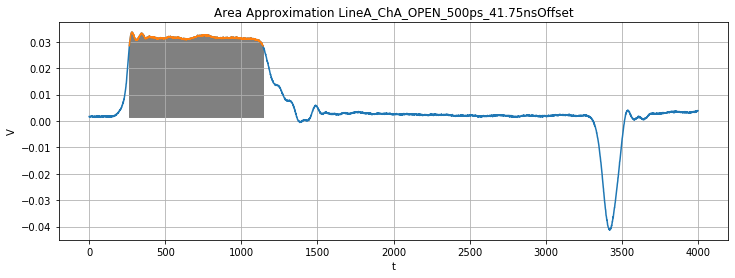

In [19]:
# Define starting/ending points of input waveform
x10R,x90R = RiseTime( LineA_ChA_OPEN_500ps_41[0:1000] )
x90F,x10F = FallTime( LineA_ChA_OPEN_500ps_41[1000:1500] )

# Area Approximation: LineA_ChA_OPEN_500ps_41.75nsOffset
a = x90R
b = 1000+x90F
n = b-a
f = LineA_ChA_OPEN_500ps_41
offset = np.median(f[:100])
A = Waveform_Area(f,a,b,n,
    offset=offset,
    title='LineA_ChA_OPEN_500ps_41.75nsOffset'
)

In [20]:
L = len(f)
x,res = np.linspace(0,500*10**(-12),L,endpoint=False,retstep=True)
A = A*res
print(f'Adjusted Area for Vb = {A}')

Adjusted Area for Vb = 3.2820425625000043e-12


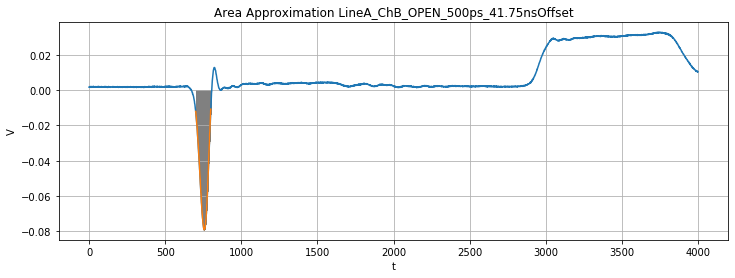

In [21]:
# Area Approximation: LineA_ChB_OPEN_500ps_41.75nsOffset 
a = 700
b = 800
n = b-a
f = LineA_ChB_OPEN_500ps_41
offset = 0
A = Waveform_Area(f,a,b,n,
    offset=offset,
    title='LineA_ChB_OPEN_500ps_41.75nsOffset'
)

In [22]:
L = len(f)
x,res = np.linspace(0,500*10**(-12),L,endpoint=False,retstep=True)
A = A*res
print(f'Adjusted Area for Vf = {A}')

Adjusted Area for Vf = -6.17216125e-13


Measured:

$\text{area}(V_b) = 3.2820 \cdot 10^{-12} $

$\text{area}(V_f) = -6.1721 \cdot 10^{-13} $


**Integration**

$\begin{eqnarray}
\int_{0}^{\infty} V_f dt &=& \int_{0}^{\infty} [\frac{K_C-K_L}{2v_0} \cdot d \cdot 
    \frac{d V_{in}}{dt}] dt && \rightarrow V_{\text{peak}} = 
    V_{in}(t) - V_{in}(t-\frac{2d}{v_0})]\\
\\
                    &\approx& [\frac{K_C-K_L}{2v_0} \cdot d \cdot 
    \frac{V_{\text{peak}}}{t_{\text{rise}}}] \int_{0}^{t_{\text{rise}}} dt \\
\\
\text{area}(V_f)    &=& \frac{K_C-K_L}{2v_0} \cdot d \cdot V_{\text{peak}} \\
\\
K_C-K_L             &=& \frac{2 v_0}{d \cdot V_{\text{peak}}} \text{area}(V_f)   \\
\\
K_C-K_L             &=& 0.0899  && (1)\\
\\
\int_{0}^{\infty} V_b dt &=& \int_{0}^{\infty} \frac{K_C-K_L}{4}[V_{in}(t) - 
    V_{in}(t-\frac{2d}{v_0}]dt \\
\\
\text{area}(V_b)    &=& \frac{K_C-K_L}{2v_0} \cdot V_{\text{peak}} * \frac{2d}{v_0} \\
\\
K_C+K_L             &=& \frac{4 v_0}{2d \cdot V_{\text{peak}}} \text{area}(V_b)  \\
\\
K_C+K_L             &=& 0.4779  && (2)\\
\end{eqnarray}$

**Integration Summary $K_C$ and $K_L$**

Solving two equations with two unknowns. Thus $K_C = 0.1940$ and $K_L = 0.2839$.

| Parameter | Measured | Given   |
|-----------|----------|---------|
| $K_C$     | 0.1940   | 0.19220 |
| $K_L$     | 0.2839   | 0.28164 |

### Estimation of $C_{1G}, C_{2G}, C_{12}, L_{11}, L_{22}, L_{12} $

<img src='images/equivalent_circuit.png' width='500px'>

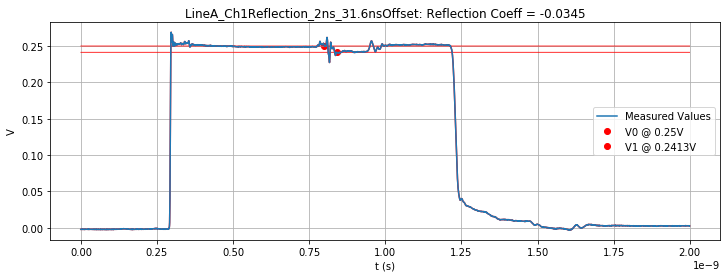

In [42]:
# Reflection Coefficient: LineA_Ch1Reflection_2ns_31.6nsOffset

np_arr = LineA_Ch1Reflection_2ns_31
total_time = 2*10**(-9)
method=None
mag=9
unit='V'
title='LineA_Ch1Reflection_2ns_31.6nsOffset'
    
# Figure
fig,ax = plt.subplots(figsize=(12,4))
L = len(np_arr)
x,res = np.linspace(0,total_time,L,endpoint=False,retstep=True)
Ures = res*10**mag

# Find V0 and V1
V0 = np_arr[x0][0]
V1 = np_arr[x1][0]

# Plot
ax.plot(x,np_arr,  # must be plotted in this order for Matplotlib 
    color='red' 
)
ax.scatter(x0*res,np_arr[x0],
    color='red',
    label=f'V0 @ {round(V0,4)}{unit}'
)
ax.scatter(x1*res,np_arr[x1],
    color='red',
    label=f'V1 @ {round(V1,4)}{unit}'
)
ax.plot(x,np.ones(L)*V0,
    color='red',
    linewidth=0.8
)
ax.plot(x,np.ones(L)*V1,
    color='red',
    linewidth=0.8
)
ax.plot(x,np_arr,
    label='Measured Values'
)

# Labels
ax.ticklabel_format(axis='x',style='sci', scilimits=(-mag,-mag))
ax.set_title(f'{title}: Reflection Coeff = {round((V1-V0)/V0,4)}')
ax.set_xlabel('t (s)')
ax.set_ylabel('V')
plt.grid(True)
plt.legend();

**Unknown Parameters Analysis**

Given:

$\begin{eqnarray}
C_{1G} && &=& && C_{2G} \\
L_{11} && &=& && L_{22} \\
K_C    && &=& && 0.1940 \\
K_L    && &=& && 0.2839 \\
v_0    && &=& && 1.82 \cdot 10^8 \text{m/s} \\
\Gamma && &=& && -0.0345
\end{eqnarray}$

Solve:

$\begin{eqnarray}
C_1    &&  &=& && C_{1G} + C_{12}            &=& && C_2 \\
\\
Z_{01} &&  &=& && \sqrt{\frac{L_{11}}{C_1}}  &=& && \sqrt{\frac{L_{11}}{C_{1G}+C_{12}}}   &=& && Z_{02} \\
v_1    &&  &=& && \frac{1}{\sqrt{L_{11}C_1}} &=& && \frac{1}{\sqrt{L_{11}(C_{1G}+C_{12})}} 
    &=& && v_2 \\
K_C && &=& &&\frac{C_{12}}{C_{1G}+C_{12}} \\
\\
K_L && &=& &&\frac{L_{12}}{L_{11}} 
\end{eqnarray}$

Calculations;

$\begin{eqnarray}
\Gamma  &&  &=& && −0.0345 &=& &&
    \frac{Z_{01}-Z_0}{Z_{01}+Z_0} \\
\\
        &&  && && −0.0345 &=& &&
    \frac{Z_{01}-50}{Z_{01}+50} \\
\\
        &&  && && Z_{01} &=& && 46.67 \\
\\
46.67  &&  &=& && \sqrt{\frac{L_{11}}{C_1}}  &=& && \sqrt{\frac{L_{11}}{C_{1G}+C_{12}}}
    && (1) \\
1.82\cdot 10^8    &&  &=& && \frac{1}{\sqrt{L_{11}C_1}} &=& && \frac{1}{\sqrt{L_{11}(C_{1G}+C_{12})}} 
    && (2) \\
0.1940 && &=& &&\frac{C_{12}}{C_{1G}+C_{12}} && && && (3)\\
\\
0.2839 && &=& &&\frac{L_{12}}{L_{11}} && && && (4) 
\end{eqnarray}$

**Unknown Parameters Summary**

Solving four equations with four unknowns. The reflection of the coupled TL is necessary to calculate the reflection coefficient. Once we find this, we can find the individual characteristic impedance $Z_{01}$. Find the self-capacitance ($C_{1G}=C_{2G}$), mutual capacitance ($C_{12}$), self-inductance($L_{11}, L_{22}$), and mutual inductance($L_{12}$) in the table.

| Parameter                  |   | units |   | Measured              |   | Given          |
|-:--------------------------|---|-------|---|-----------------------|---|----------------|
| $v_0$                      |   | m/s   |   | $1.82$ $\cdot$ $10^8$ |   | $1.71$ $\cdot$ $10^8$ |
| $K_C$ (method 1)           |   |       |   | $0.1940$              |   | $0.19890$      |
| $K_L$ (method 1)           |   |       |   | $0.2839$              |   | $0.26191$      |
| $K_C$ (integration method) |   |       |   | $0.1940$              |   | $0.19220$      |
| $K_L$ (integration method) |   |       |   | $0.2839$              |   | $0.28164$      |
| $Z_{01}$                   |   | ohms  |   | $46.67$               |   | $45.97$        |
| $C_{12}$                   |   | pF    |   | $22.83$               |   | $24.50$        |
| $C_{1G} = C_{2G}$          |   | pF    |   | $94.89$               |   | $102.77$       |
| $L_{11} = L_{22}$          |   | nH    |   | $256.43$              |   | $268.80$       |
| $L_{12}$                   |   | nH    |   | $61.26$               |   | $75.71$        |


### Questions

1. What

2. What

3. What

    -(a) What

    -(b) What

    -(c) What

<img src='images/setup.png' width='500px'>

| Data       || Short || Open   ||
|:-------    ||:---|:---|:---|:---|
|            || rising edge  | falling edge  | rising edge  | falling edge  |
| LineA_ChA  || pos  | neg  | pos  | pos  |
| LineA_ChB  || neg  | pos  | neg  | neg  |
| LineB_ChA  || pos  | neg  | pos  | pos  |
| LineB_ChB  || neg  | pos  | neg  | neg  |
| LineC_ChA  || pos  | neg  | pos  | pos  |
| LineC_ChB  || neg  | pos  | neg  | neg  |